In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import dataset of housing prices
houses_data=pd.read_csv("C:\\Users\\harsh\\Desktop\\housing price data.csv")

In [12]:
houses_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
#dataset values
houses_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#check for any null value
houses_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Text(0, 0.5, 'prices')

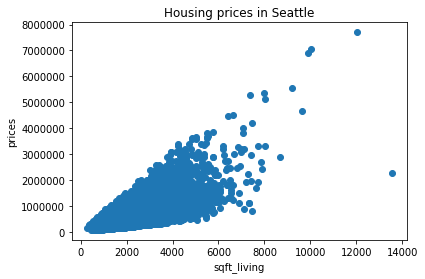

In [13]:
plt.scatter(houses_data['sqft_living'],houses_data['price'])
plt.title("Housing prices in Seattle")
plt.xlabel("sqft_living")
plt.ylabel("prices")

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error

In [16]:
#define independent and dependent variables
#create x and y
feature_cols = 'sqft_living'
x = houses_data[feature_cols]
y = houses_data.price

In [7]:
x.head()

0    1180
1    2570
2     770
3    1960
4    1680
Name: sqft_living, dtype: int64

In [8]:
y.head()

0    221900
1    538000
2    180000
3    604000
4    510000
Name: price, dtype: int64

In [9]:
#split the data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
#the test data will bne 20% ofj tyhe whole data set

In [27]:
train_x = np.array(x_train).reshape(-1,1)

In [28]:
train_y = np.array(y_train).reshape(-1,1)

In [42]:
test_x = np.array(x_test).reshape(-1,1)

In [43]:
test_y = np.array(y_test).reshape(-1,1)

In [29]:
#fitting of model on the training dataset
linreg = LinearRegression()
linreg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'prices')

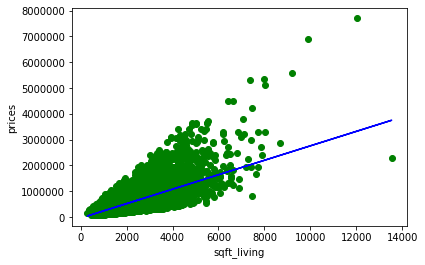

In [54]:
#plotting of training dataset
plt.scatter(train_x,train_y,color='green')
plt.plot(train_x,linreg.predict(train_x),color='blue')
plt.xlabel("sqft_living")
plt.ylabel("prices")

In [39]:
#print the coefficients
print (linreg.intercept_)
print(linreg.coef_)

[-41909.67319901]
[[280.07156364]]


In [44]:
pred_y = linreg.predict(test_x)

In [45]:
pred_y[3]

array([490226.29771864])

In [46]:
test_y[3]

array([405000], dtype=int64)

In [50]:
#predicting the house price of 1000 sq_ft
#manually
a = linreg.intercept_ + linreg.coef_*1000
b = pred_y[1000]

In [51]:
print(a)
print(b)

[[238161.89044186]]
[361393.37844384]


In [52]:
mse = mean_squared_error(test_y,pred_y)

In [53]:
mse

70893513830.06235

Text(0, 0.5, 'prices')

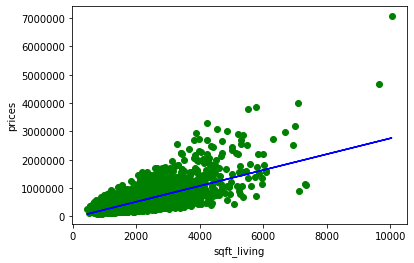

In [56]:
plt.scatter(test_x,test_y,color='green')
plt.plot(test_x,pred_y,color = 'blue')
plt.xlabel("sqft_living")
plt.ylabel("prices")

In [76]:
m = max(houses_data['price'])
m

7700000